

#Imports and Installations




In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/BT4222 Project')
os.chdir('Datasets/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install transformers

In [3]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("nghuyong/ernie-2.0-base-en")
model = AutoModel.from_pretrained("nghuyong/ernie-2.0-base-en")

#Load Data into Dataframes


In [4]:
# Import train and test data from CSV
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

In [5]:
# Import train and test data from CSV
train_df = pd.read_csv('train_reduced.csv')
test_df = pd.read_csv('test_reduced.csv')

In [6]:
train_df.head(5)


,userId,rating,timestamp_rated,tag,ml_title,tmdbId,cast,crew,keywords,original_title,...,spoken_language_Español,spoken_language_Français,spoken_language_Italiano,has_homepage,gross_profit,roi,profit_margin,tagline_sentiment_score_average,overview_sentiment_score_average,release_year
0,25,4.0,2010-07-01 05:54:30,NaN,Rain Man (1988),380,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...","Hans Zimmer, Linda DeScenna, Louis DiGiaimo, W...","individual, mentally disabled, autism, loss of...",Rain Man,...,0,0,1,0,387800000.0,15.512000,0.939438,0.00000,-0.363350,1988
1,25,3.5,2010-07-01 05:53:13,NaN,One Flew Over the Cuckoo's Nest (1975),510,"Jack Nicholson, Louise Fletcher, Danny DeVito,...","Jane Feinberg, Mike Fenton, Arthur Coburn, Sau...","individual, rebel, self-destruction, wheelchai...",One Flew Over the Cuckoo's Nest,...,0,0,0,0,105981275.0,35.327092,0.972472,-0.47000,-0.220000,1975
2,25,4.5,2010-07-01 05:33:00,NaN,Superbad (2007),8363,"Jonah Hill, Michael Cera, Christopher Mintz-Pl...","Bob Kensinger, Seth Rogen, Seth Rogen, Russ T....","becoming an adult, high school, young people, ...",Superbad,...,0,0,0,1,101463226.0,5.073161,0.835341,0.00000,0.460150,2007
3,25,3.5,2010-07-01 05:51:13,NaN,"Lion King, The (1994)",8587,"Jonathan Taylor Thomas, Matthew Broderick, Jam...","Mark A. Mangini, Hans Zimmer, Richard L. Ander...","loss of parents, wild boar, uncle, shaman, red...",The Lion King,...,0,0,0,1,743241776.0,16.516484,0.942911,0.87895,-0.160750,1994
4,25,3.5,2010-07-01 05:40:01,NaN,Slumdog Millionaire (2008),12405,"Dev Patel, Freida Pinto, Anil Kapoor, Mia Drak...","Anthony Dod Mantle, Danny Boyle, Gail Stevens,...","slum, indian lead, cheating, suspicion, game s...",Slumdog Millionaire,...,0,1,0,1,362910544.0,24.194036,0.960308,0.65880,-0.064667,2008


In [7]:
len(train_df['tmdbId'].unique())

len(test_df['tmdbId'].unique())

3701

In [8]:
# Retrieving unique movies from train data set
unique_movies_train = train_df.drop_duplicates(subset=['tmdbId'])
unique_movies_train = unique_movies_train.reset_index()

# Retrieving unique movies from test data set
unique_movies_test = test_df.drop_duplicates(subset=['tmdbId'])
unique_movies_test = unique_movies_test.reset_index()

In [9]:
unique_movies_train.head()

,index,userId,rating,timestamp_rated,tag,ml_title,tmdbId,cast,crew,keywords,...,spoken_language_Español,spoken_language_Français,spoken_language_Italiano,has_homepage,gross_profit,roi,profit_margin,tagline_sentiment_score_average,overview_sentiment_score_average,release_year
0,0,25,4.0,2010-07-01 05:54:30,NaN,Rain Man (1988),380,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...","Hans Zimmer, Linda DeScenna, Louis DiGiaimo, W...","individual, mentally disabled, autism, loss of...",...,0,0,1,0,387800000.0,15.512000,0.939438,0.00000,-0.363350,1988
1,1,25,3.5,2010-07-01 05:53:13,NaN,One Flew Over the Cuckoo's Nest (1975),510,"Jack Nicholson, Louise Fletcher, Danny DeVito,...","Jane Feinberg, Mike Fenton, Arthur Coburn, Sau...","individual, rebel, self-destruction, wheelchai...",...,0,0,0,0,105981275.0,35.327092,0.972472,-0.47000,-0.220000,1975
2,2,25,4.5,2010-07-01 05:33:00,NaN,Superbad (2007),8363,"Jonah Hill, Michael Cera, Christopher Mintz-Pl...","Bob Kensinger, Seth Rogen, Seth Rogen, Russ T....","becoming an adult, high school, young people, ...",...,0,0,0,1,101463226.0,5.073161,0.835341,0.00000,0.460150,2007
3,3,25,3.5,2010-07-01 05:51:13,NaN,"Lion King, The (1994)",8587,"Jonathan Taylor Thomas, Matthew Broderick, Jam...","Mark A. Mangini, Hans Zimmer, Richard L. Ander...","loss of parents, wild boar, uncle, shaman, red...",...,0,0,0,1,743241776.0,16.516484,0.942911,0.87895,-0.160750,1994
4,4,25,3.5,2010-07-01 05:40:01,NaN,Slumdog Millionaire (2008),12405,"Dev Patel, Freida Pinto, Anil Kapoor, Mia Drak...","Anthony Dod Mantle, Danny Boyle, Gail Stevens,...","slum, indian lead, cheating, suspicion, game s...",...,0,1,0,1,362910544.0,24.194036,0.960308,0.65880,-0.064667,2008


In [10]:
unique_movies_test.head()

len(unique_movies_train)

3881

#ERNIE Model (Generating Embeddings)

In [11]:

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch

In [12]:
# Function to encode texts to embeddings using ERNIE (or any Hugging Face model)
def encode_texts(texts, model, tokenizer, batch_size=1024, max_length=512):
    # Ensure model is on GPU if available
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    # Break the texts into batches to avoid memory issues
    embeddings = []
    for i in range(0, len(texts), batch_size):
        # Process texts in the current batch
        batch_texts = texts[i:i+batch_size]
        # Tokenize batch texts with dynamic padding and truncation
        encoded_input = tokenizer(
            batch_texts,
            padding='longest',  # Dynamic padding to the longest sequence in the batch
            truncation=True,    # Truncate to max_length
            max_length=max_length,
            return_tensors='pt'
        ).to(device)

        # Generate embeddings with no gradient calculations
        with torch.no_grad():
            model_output = model(**encoded_input)

        # Pool the outputs into a single mean vector per batch item
        batch_embeddings = model_output.last_hidden_state.mean(dim=1)
        # Move embeddings to CPU and convert to numpy for further processing or storage
        embeddings.append(batch_embeddings.cpu().numpy())

    # Concatenate all batch embeddings into a single matrix
    embeddings = np.vstack(embeddings)

    return embeddings


In [13]:
# Generate ERNIE embeddings for the training set
train_embeddings = encode_texts(unique_movies_train['overview'].tolist(), model, tokenizer)

# Generate ERNIE embeddings for the test set
test_embeddings = encode_texts(unique_movies_test['overview'].tolist(), model, tokenizer)


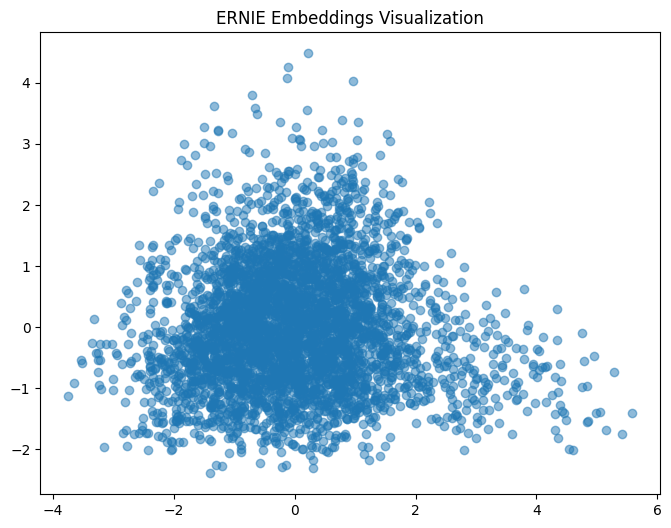

In [14]:
# Visualize embeddings using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(train_embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
plt.title('ERNIE Embeddings Visualization')
plt.show()


In [15]:
# Calculate cosine similarity between test and train embeddings
cosine_sim = cosine_similarity(test_embeddings, train_embeddings)


In [56]:
# Retrieve top-k recommendations for each test movie
top_k = 10
test_recommendations = {}

for i, row in unique_movies_test.iterrows():
    # Check if the test movie exists in the training data
    if row['tmdbId'] in unique_movies_train['tmdbId'].values:
        similar_movies_indices = cosine_sim[i].argsort()[-top_k:][::-1]
        recommended_movies = [unique_movies_train.iloc[idx]['tmdbId'] for idx in similar_movies_indices]
    else:
        # Handle the case where the test movie doesn't exist in the training data
        unseen_embedding = encode_texts([row['overview']], model, tokenizer)
        similarity_scores = cosine_similarity(unseen_embedding, train_embeddings)
        similar_movies_indices = similarity_scores[0].argsort()[-top_k:][::-1]
        recommended_movies = [unique_movies_train.iloc[idx]['tmdbId'] for idx in similar_movies_indices]

    # Store the recommendations for the current test movie
    test_recommendations[row['tmdbId']] = recommended_movies



In [57]:
def generate_recommendation_table(recommended_movie_ids, movie_data):
    """
    Generate a table with titles and IDs of the recommended movies in the descending order of similarity scores.

    Parameters:
    - recommended_movie_ids (list): List of tmdbIds of recommended movies.
    - movie_data (DataFrame): DataFrame containing movie information.

    Returns:
    - DataFrame: Table with titles and IDs of the recommended movies.
    """
    # Filter movie_data based on recommended_movie_ids and select relevant columns
    recommendation_table = movie_data[movie_data['tmdbId'].isin(recommended_movie_ids)][['tmdbId', 'ml_title', 'overview']]

    # Create a dictionary to map tmdbId to its index in the recommended_movie_ids array
    id_index_mapping = {tmdb_id: index for index, tmdb_id in enumerate(recommended_movie_ids)}

    # Add a new column 'order' based on the order in recommended_movie_ids
    recommendation_table['order'] = recommendation_table['tmdbId'].map(id_index_mapping)

    # Sort the DataFrame based on the 'order' column
    recommendation_table = recommendation_table.sort_values(by='order')

    # Drop the 'order' column as it's no longer needed
    recommendation_table = recommendation_table.drop('order', axis=1)

    return recommendation_table

In [58]:
unique_movies_test[unique_movies_test['tmdbId'] == 9700][['tmdbId', 'ml_title', 'overview']]

,tmdbId,ml_title,overview
3326,9700,"Lost City, The (2005)","In Havana, Cuba in the late 1950's, a wealthy ..."


In [59]:
test_unseen_movie = test_recommendations[9700]

generate_recommendation_table(test_unseen_movie, unique_movies_train)

,tmdbId,ml_title,overview
2309,27936,Micmacs (Micmacs à tire-larigot) (2009),A man and his friends come up with an intricat...
3228,39541,Stolen Summer (2002),"Pete, an eight-year-old Catholic boy growing u..."
69,98,Gladiator (2000),"In the year 180, the death of emperor Marcus A..."
2257,10592,Hart's War (2002),Fourth-generation Army Col. William McNamara i...
2002,1255,"Host, The (Gwoemul) (2006)",Gang-du is a dim-witted man working at his fat...
520,595,To Kill a Mockingbird (1962),"In a small Alabama town in the 1930s, scrupulo..."
589,10685,"Watcher, The (2000)","FBI agent Joel Campbell, burnt-out and shell-s..."
2150,11658,Tae Guk Gi: The Brotherhood of War (Taegukgi h...,"In 1950, in South Korea, shoe-shiner Jin-tae L..."
2000,54580,"Mondays in the Sun (Lunes al sol, Los) (2002)",After the closure of their shipyard in Norther...
1511,20737,Air Bud (1997),A young boy and a talented stray dog with an a...


##Evaluation Metrics


In [61]:
def calculate_precision_at_k(test_recommendations, test_df, k=10):
    # List to store precision scores
    precision_scores = []

    # Iterate over unique user IDs in the test set
    unique_user_ids = test_df['userId'].unique()

    for user_id in unique_user_ids:
        # Retrieve user-specific data from the test set
        user_data = test_df[test_df['userId'] == user_id]

        # Initialize variables to store relevant and recommended movies
        # Retrieve unique movies that have been rated by the user
        # Each rating is considered as an interaction
        rated_movies = set(user_data['tmdbId'])

        precision_by_user = []

        # Iterate over movies rated by the user
        for _, movie_row in user_data.iterrows():
            movie_id = movie_row['tmdbId']
            # Retrieve the list of 10 recommendations for the current movie
            recommendations_for_movie = set(test_recommendations.get(movie_id, []))

            # Retrieve recommended movies that are relevant
            relevant_movies = rated_movies & recommendations_for_movie

            # Calculate the precision@k for current movie for current user
            precision = len(relevant_movies) / k
            precision_by_user.append(precision)

        # Calculate average precision for the current user
        precision_temp = sum(precision_by_user) / len(precision_by_user)
        precision_scores.append(precision_temp)

    # Calculate the average precision across all users
    average_precision = sum(precision_scores) / len(precision_scores)

    return average_precision




In [62]:
def calculate_recall_at_k(test_recommendations, test_df, k=10):
    # List to store recall scores
    recall_scores = []

    # Iterate over unique user IDs in the test set
    unique_user_ids = test_df['userId'].unique()

    for user_id in unique_user_ids:
        # Retrieve user-specific data from the test set
        user_data = test_df[test_df['userId'] == user_id]

        # Initialize variables to store relevant and recommended movies
        # Retrieve unique movies that have been rated by the user
        # Each rating is considered as an interaction
        rated_movies = set(user_data['tmdbId'])
        num_of_rated_movies = len(rated_movies)

        recall_by_user = []

        # Iterate over movies rated by the user
        for _, movie_row in user_data.iterrows():
            movie_id = movie_row['tmdbId']
            # Retrieve the list of 10 recommendations for the current movie
            recommendations_for_movie = set(test_recommendations.get(movie_id, []))

            # Retrieve recommended movies that are relevant
            relevant_movies = rated_movies & recommendations_for_movie

            # Calculate the recall@k for the current movie for the current user
            recall = len(relevant_movies) / num_of_rated_movies if num_of_rated_movies > 0 else 0
            recall_by_user.append(recall)

        # Calculate average recall for the current user
        recall_temp = sum(recall_by_user) / len(recall_by_user)
        recall_scores.append(recall_temp)

    # Calculate the average recall across all users
    average_recall = sum(recall_scores) / len(recall_scores)

    return average_recall

In [37]:
def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


In [38]:
import numpy as np

def ndcg_at_k(relevance_scores, k):
    # Ensure the relevance scores have length k by padding with zeros if needed
    relevance_scores = np.asarray(relevance_scores)[:k]
    padded_scores = np.zeros(k)
    padded_scores[:len(relevance_scores)] = relevance_scores

    # Discounted Cumulative Gain (DCG)
    gains = 2 ** padded_scores - 1  # 2^rel_i - 1
    discounts = np.log2(np.arange(k) + 2)  # log_2(i+1)
    dcg = np.sum(gains / discounts)

    # Ideal Discounted Cumulative Gain (IDCG)
    sorted_scores = np.sort(padded_scores)[::-1]  # Sort in descending order
    idcg = np.sum(sorted_scores / discounts)

    # Normalized Discounted Cumulative Gain (NDCG)
    return dcg / idcg if idcg > 0 else 0

def calculate_ndcg_at_k(test_recommendations, test_df, k=10):
    ndcg_scores = []
    unique_user_ids = test_df['userId'].unique()

    for user_id in unique_user_ids:
        user_data = test_df[test_df['userId'] == user_id]
        rated_movies = set(user_data['tmdbId'])
        recommended_movies = test_recommendations.get(user_id, [])

        # Convert to binary relevance scores
        relevance_scores = [1 if movie in rated_movies else 0 for movie in recommended_movies[:k]]

        # Calculate NDCG for the current user
        ndcg = ndcg_at_k(relevance_scores, k)
        ndcg_scores.append(ndcg)

    # Calculate the average NDCG across all users
    average_ndcg = np.mean(ndcg_scores) if ndcg_scores else 0
    return average_ndcg


In [63]:
# Calculating the evaluation metrics
average_precision = calculate_precision_at_k(test_recommendations, test_df, k=10)
average_recall = calculate_recall_at_k(test_recommendations, test_df, k=10)
average_f1_score = calculate_f1_score(average_precision, average_recall)
average_ndcg = calculate_ndcg_at_k(test_recommendations, test_df, k=10)

print(f'Average Precision at k: {average_precision}')
print(f'Average Recall at k: {average_recall}')
print(f'Average F1 Score at k: {average_f1_score}')
print(f'Average NDCG at k: {average_ndcg}')

Average Precision at k: 0.10982311127173162
Average Recall at k: 0.11255178890177471
Average F1 Score at k: 0.11117070880524413
Average NDCG at k: 0.0006984688685330628
